######The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. The dataset consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.



Import Libraries

In [31]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
iris = pd.read_csv("iris.csv")

In [33]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### *We can see that we have a column named ID that we donot need , so let's drop it !*

In [34]:
iris.drop("Id", axis=1, inplace = True)

In [35]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


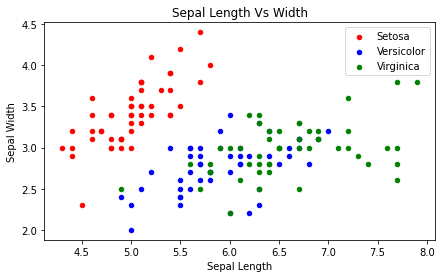

In [36]:
figure = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=figure)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=figure)

figure.set_xlabel('Sepal Length')
figure.set_ylabel('Sepal Width')
figure.set_title('Sepal Length Vs Width')

figure=plt.gcf()
figure.set_size_inches(7, 4)
plt.show()

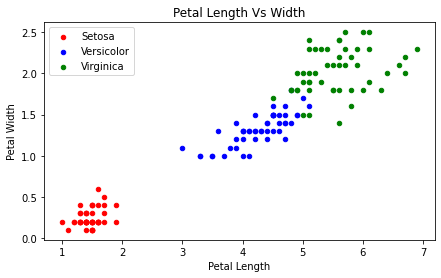

In [37]:
figure = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=figure)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=figure)

figure.set_xlabel('Petal Length')
figure.set_ylabel('Petal Width')
figure.set_title('Petal Length Vs Width')

figure=plt.gcf()
figure.set_size_inches(7, 4)
plt.show()

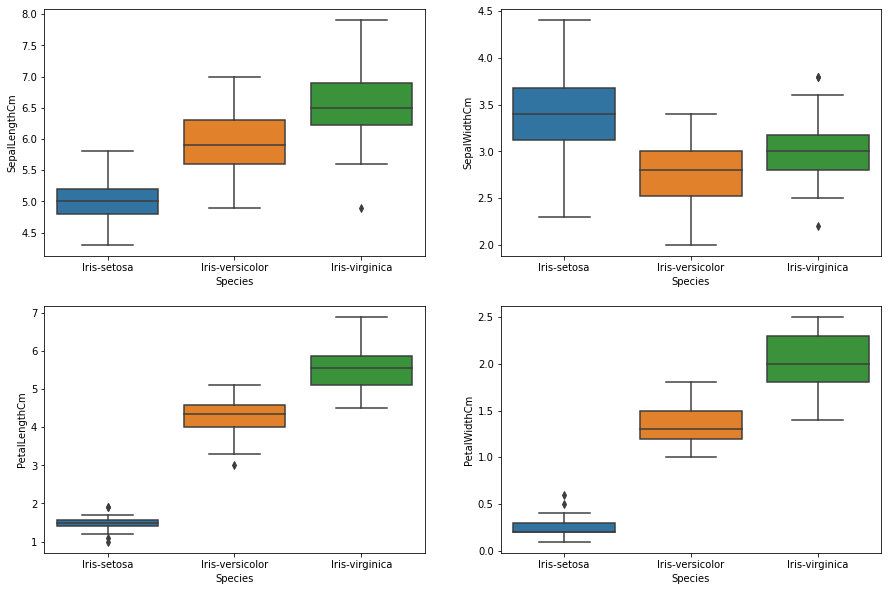

In [53]:
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)    
plt.subplot(2,2,2)    
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)    
plt.subplot(2,2,3)    
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)    
plt.subplot(2,2,4)    
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)  

In [54]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

Splitting The Data into Training And Testing Dataset

In [40]:
train, test = train_test_split(iris, test_size=0.2) 
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [42]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
train_y = train.Species 

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y = test.Species 

1. Logistic Regression

In [63]:
model1 = LogisticRegression()
model1.fit(train_X, train_y)
prediction1 = model1.predict(test_X)
print('Accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction1, test_y))

Accuracy of Logistic Regression is:  0.9333333333333333


2. SVM Classifier

In [64]:
model2 = svm.SVC() 
model2.fit(train_X, train_y)
prediction2 = model2.predict(test_X)
print('Accuracy of SVM is: ', metrics.accuracy_score(prediction2, test_y))

Accuracy of SVM is:  0.9666666666666667


3. K-Nearest Neighbors

In [65]:
model3 = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors 
model3.fit(train_X, train_y)
prediction3 = model3.predict(test_X)
print('Accuracy of KNN is: ', metrics.accuracy_score(prediction3, test_y))

Accuracy of KNN is:  0.9666666666666667


4. Decision Tree

In [66]:
model4 = DecisionTreeClassifier()
model4.fit(train_X, train_y)
prediction4 = model4.predict(test_X)
print('Accuracy of Decision Tree is: ', metrics.accuracy_score(prediction4, test_y))

Accuracy of Decision Tree is:  0.9


5. XGBoost

In [67]:
model5 = xgb.XGBClassifier()
model5.fit(train_X, train_y)
prediction5 = model5.predict(test_X)
print('Accuracy of xgb classifier is: ', metrics.accuracy_score(prediction5, test_y))

Accuracy of xgb classifier is:  0.9333333333333333
